In [1]:
%load_ext autoreload
%autoreload 2

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from src.classes import *
import time
from IPython.display import display, clear_output

import seaborn as sns
sns.set(style="whitegrid", palette="deep", color_codes=True)

# Colors
Scol = "#07D5E6"
Ecol = "#FFD700"
Icol = "#FB9214"
Rcol = "#3B7548"
Dcol = "#EA1313"
Ccol = "#123456"

### Parameter investigation

0.042650245635357666
0.9517022492877906


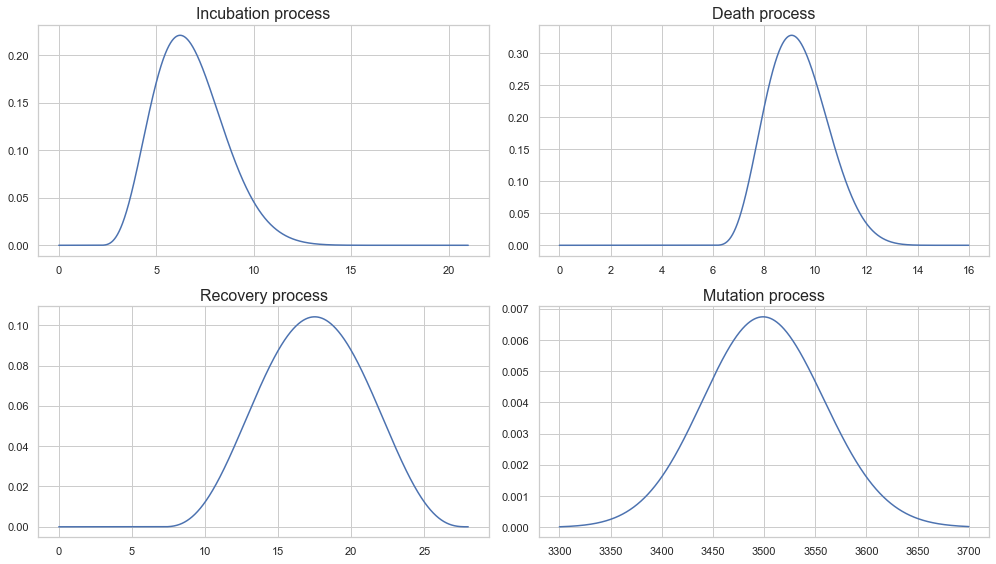

In [2]:
fig = plt.subplots(nrows=2, ncols=2,figsize = (14,8))
plt.sca(fig[0].axes[0])
# Incubation
rv = ss.beta(a=5,b=15,loc=2,scale=19)
x = np.linspace(0,21,10000)
plt.plot(x,rv.pdf(x))
plt.title("Incubation process", fontsize = 16)
print(rv.cdf(4))
print(rv.cdf(10))

# Death process
plt.sca(fig[0].axes[1])
rv = ss.beta(a=5,b=10,loc=6,scale=10)
x = np.linspace(0,16,10000)
plt.title("Death process", fontsize = 16)
plt.plot(x,rv.pdf(x))

# Recovery
plt.sca(fig[0].axes[2])
rv = ss.beta(a=4,b=4,loc=7,scale=21)
x = np.linspace(0,28,10000)
plt.title("Recovery process", fontsize = 16)
plt.plot(x,rv.pdf(x))

# Mutation
plt.sca(fig[0].axes[3])
rv = ss.erlang(3500)
x = np.linspace(3300,3700,10000)
plt.title("Mutation process", fontsize = 16)
plt.plot(x,rv.pdf(x))

plt.tight_layout() 
plt.savefig('../reports/figures/Ebola_processes.pdf', format='pdf')
plt.show()

### Actual model

Model done! Took 0.7882111072540283 seconds


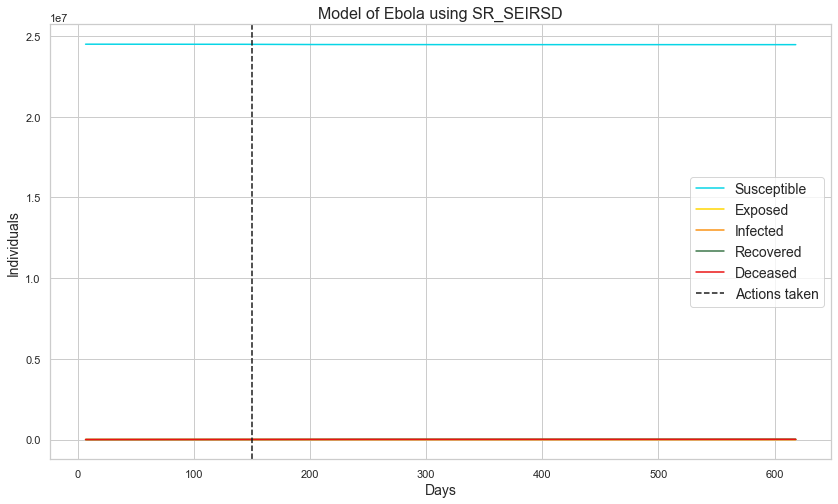

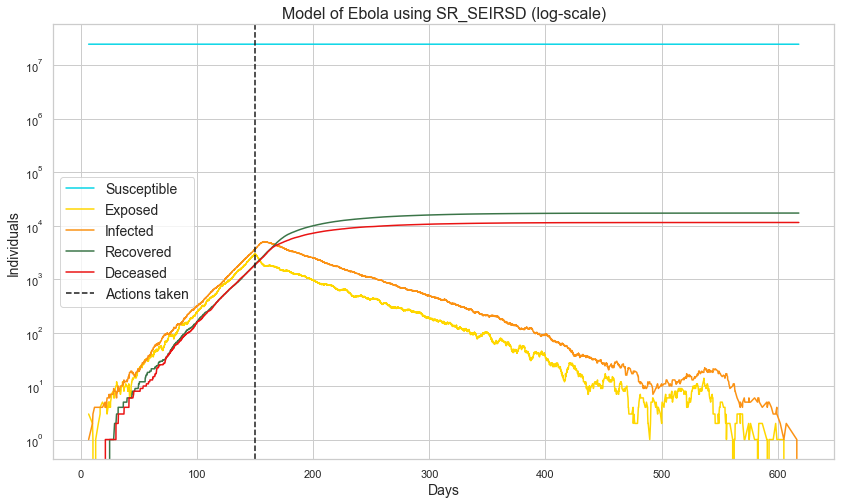

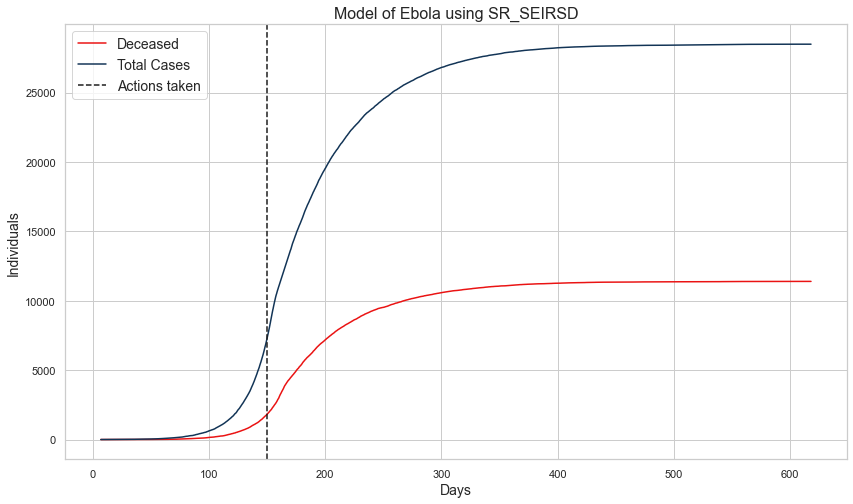

ALl done! Toke 4.439484119415283 seconds
State(S=24471506, E=0, I=0, R=17096, D=11398, C=28495)


In [3]:
# Current time and set seed 
t = time.time()
np.random.seed(1)

# Parameters
beta = 0.14
new_beta = 0.055
beta_change = 150
population = 24_500_000
init_exposed = 4
prob_dead = 11314/28637 # =0.395

# Processeces
incubation_process = ss.beta(a=5,b=15,loc=2,scale=19)
recovery_process = ss.beta(a=4,b=4,loc=7,scale=21)
death_process = ss.beta(a=5,b=10,loc=6,scale=10)
mutation_process = ss.erlang(3500)

        
es = Ebola_SEIRSD(
    beta,
    incubation_process,
    recovery_process,
    death_process,
    mutation_process,
    population=population, 
    init_exposed=init_exposed,
    prob_dead=prob_dead,
    beta_change = beta_change,
    new_beta=new_beta
)


history = [(day, S, E, I, R, D, C) for __, day, (S, E, I, R, D, C) in es.run_until(1500)]
day, S, E, I, R, D, C = zip(*history)

print("Model done! Took {} seconds".format(time.time()-t))

# Plot
fig = plt.figure(figsize = (14, 8))
plt.plot(day, S, label = "Susceptible", color = Scol)
plt.plot(day, E, label = "Exposed", color = Ecol)
plt.plot(day, I, label = "Infected", color = Icol)
plt.plot(day, R, label = "Recovered", color = Rcol)
plt.plot(day, D, label = "Deceased", color = Dcol)
plt.axvline(x=beta_change, c = "k", ls = "--", label = "Actions taken")
plt.legend(fontsize = 14)
plt.title("Model of Ebola using SR_SEIRSD", fontsize = 16)
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.show()


# Log plot
fig = plt.figure(figsize = (14, 8))
plt.plot(day, S, label = "Susceptible", color = Scol)
plt.plot(day, E, label = "Exposed", color = Ecol)
plt.plot(day, I, label = "Infected", color = Icol)
plt.plot(day, R, label = "Recovered", color = Rcol)
plt.plot(day, D, label = "Deceased", color = Dcol)
plt.axvline(x=beta_change, c = "k", ls = "--", label = "Actions taken")
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title("Model of Ebola using SR_SEIRSD (log-scale)", fontsize = 16)
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.savefig('../reports/figures/Ebola_log.pdf', format='pdf')
plt.show()


fig = plt.figure(figsize = (14, 8))
plt.plot(day, D, label = "Deceased", color = Dcol)
plt.plot(day, C, label = "Total Cases", color = Ccol)
plt.axvline(x=beta_change, c = "k", ls = "--", label = "Actions taken")
plt.legend(fontsize = 14)
plt.title("Model of Ebola using SR_SEIRSD", fontsize = 16)
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.savefig('../reports/figures/Ebola_DC.pdf', format='pdf')
plt.show()

# Print time
print("ALl done! Toke {} seconds".format(time.time()-t))
print(es.state)

Notes:

- Den initiale beta-værdi er sat ret lavt. Ift. vores model kan det begrundes med, hvor rural Afrika er.

- Key number: https://en.wikipedia.org/wiki/West_African_Ebola_virus_epidemic_timeline_of_reported_cases_and_deaths "Thus Ebola virus disease spread for several months before it was recognized as such." Derfor cutoff ved 150 dage. Se grafer nederst for sammenligning

- Processer: https://en.wikipedia.org/wiki/Ebola


In [4]:
# Current time and set seed 
t = time.time()
np.random.seed(42)

# Parameters
beta = 0.14
new_beta = 0.055
beta_change = 150
population = 24_500_000
init_exposed = 4
prob_dead = 11314/28637 # =0.395

# Processeces
incubation_process = ss.beta(a=5,b=15,loc=2,scale=19)
recovery_process = ss.beta(a=4,b=4,loc=7,scale=21)
death_process = ss.beta(a=5,b=10,loc=6,scale=10)
mutation_process = ss.erlang(3500)


num_sim = 1000
day = [None]*num_sim
S = [None]*num_sim
E = [None]*num_sim
I = [None]*num_sim
R = [None]*num_sim
D = [None]*num_sim
C = [None]*num_sim

for i in range(num_sim):    
    es = Ebola_SEIRSD(
        beta,
        incubation_process,
        recovery_process,
        death_process,
        mutation_process,
        population=population, 
        init_exposed=init_exposed,
        prob_dead=prob_dead,
        beta_change = beta_change,
        new_beta=new_beta
    )


    history = [(day, S, E, I, R, D, C) for __, day, (S, E, I, R, D, C) in es.run_until(3000)]
    day[i], S[i], E[i], I[i], R[i], D[i], C[i] = zip(*history)
    
    if (i % 10) == 0:
        clear_output(wait=True)
        display(str(i)+' iterations complete')
    
print("ALl done! Toke {} seconds".format(time.time()-t))

'990 iterations complete'

ALl done! Toke 749.762895822525 seconds


In [18]:
D_estimates = [d[-1] for d in D]
C_estimates = [c[-1] for c in C]
day_estimates = [d[-1] for d in day]
print(np.mean(D_estimates), np.quantile(D_estimates,[0.025,0.975]))
print(np.mean(C_estimates), np.quantile(C_estimates,[0.025,0.975]))

11391.831 [ 1963.65 25931.2 ]
28840.867 [ 5015.625 65741.875]


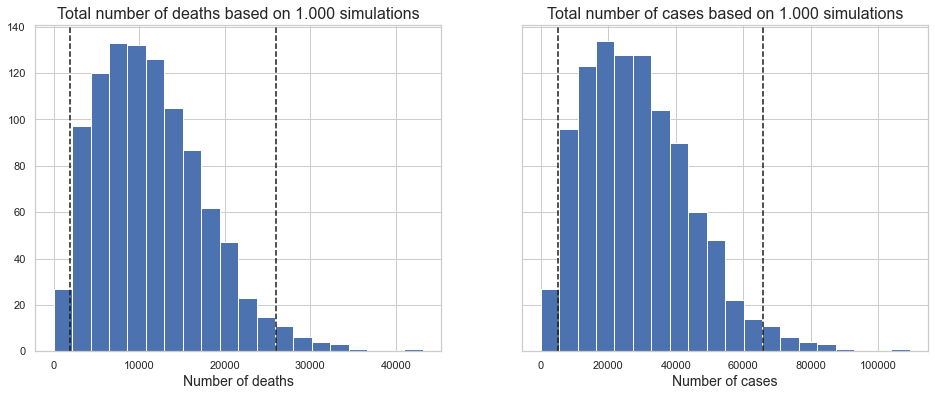

In [8]:
fig = plt.subplots(nrows=1, ncols=2,figsize = (16,6), sharey=True)

plt.sca(fig[0].axes[0])
plt.hist(D_estimates, bins = 20)
plt.title("Total number of deaths based on 1.000 simulations", fontsize = 16)
plt.xlabel("Number of deaths", fontsize = 14)
plt.axvline(x=np.quantile(D_estimates,0.025), c = "k", ls = "--")
plt.axvline(x=np.quantile(D_estimates,0.975), c = "k", ls = "--")

plt.sca(fig[0].axes[1])
plt.hist(C_estimates, bins = 20)
plt.title("Total number of cases based on 1.000 simulations", fontsize = 16)
plt.xlabel("Number of cases", fontsize = 14)
plt.axvline(x=np.quantile(C_estimates,0.025), c = "k", ls = "--")
plt.axvline(x=np.quantile(C_estimates,0.975), c = "k", ls = "--")

plt.savefig('../reports/figures/Ebola_hist.pdf', format='pdf')
plt.show()

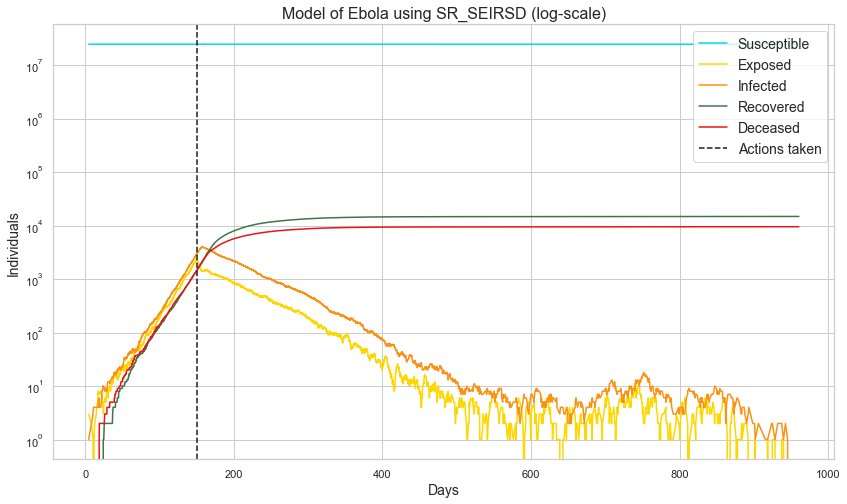

In [22]:
fig = plt.figure(figsize = (14, 8))
plt.plot(day[766], S[766], label = "Susceptible", color = Scol)
plt.plot(day[766], E[766], label = "Exposed", color = Ecol)
plt.plot(day[766], I[766], label = "Infected", color = Icol)
plt.plot(day[766], R[766], label = "Recovered", color = Rcol)
plt.plot(day[766], D[766], label = "Deceased", color = Dcol)
plt.axvline(x=beta_change, c = "k", ls = "--", label = "Actions taken")
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title("Model of Ebola using SR_SEIRSD (log-scale)", fontsize = 16)
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.show()

In [21]:
np.argmax(day_estimates)

766